In [50]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

num_players = 3
player_id = 1

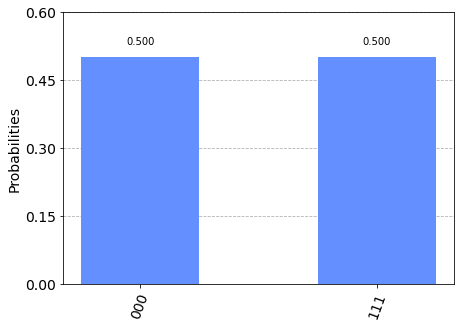

In [51]:
messages = []
coin = QuantumCircuit(num_players)

coin.h(0)

for qubit in range(num_players - 1):
    coin.cx(qubit,qubit+1)

coin.draw()

simulator = Aer.get_backend('aer_simulator')
coin.save_statevector()
state = simulator.run(assemble(coin)).result().get_statevector()

#array_to_latex(state, prefix="\\text{Statevector} = ")
plot_histogram(simulator.run(assemble(coin)).result().get_counts())

# bits = coin.qubits
# for k_player in range(num_players):
#     coin_results = [player_id, k_player, bits[k_player]]
#     messages.append(coin_results)



In [54]:
k = 3*np.log2(num_players)
num_qubits = np.around(k)
upper_bound = pow(num_players,3)

registers = []

for a in range(num_players):
    name = 'q' + str(a)
    reg = QuantumRegister(num_qubits, name)
    registers.append(reg)

leader = QuantumCircuit(*registers)
for a in range(num_players):
    name = 'q' + str(a)
    leader.h(registers[a])

leader.draw()
#needs to represent every number from 1 to upper_bound


NameError: name 'q0' is not defined